<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [45]:
# type your code here
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Read the data

Load the csv file and set the first column as index

In [46]:
# type your code here
df = pd.read_csv('car+data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

In [47]:
df.shape

(301, 9)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
df['Owner'] = df['Owner'].astype(str)

In [50]:
df = df.drop('Car_Name',axis=1)

In [51]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)

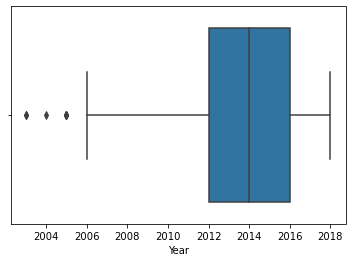

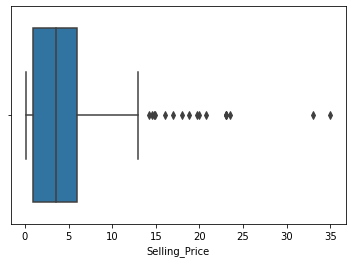

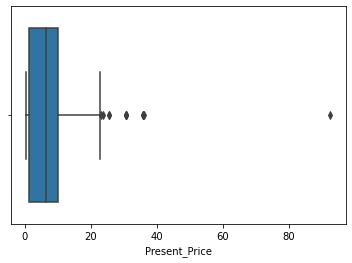

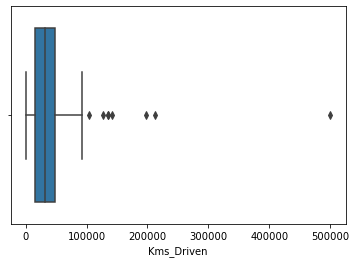

In [52]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [53]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    ub = q3 + 1.5*iqr
    lb = q1 - 1.5*iqr
    num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))

<ipython-input-53-055431d9fa36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]>ub][i],num_data[i].quantile(0.99))
<ipython-input-53-055431d9fa36>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[i] = num_data[i].replace(num_data[num_data[i]<lb][i],num_data[i].quantile(0.01))
<ipython-input-53-055431d9fa36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

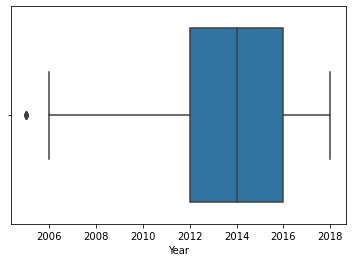

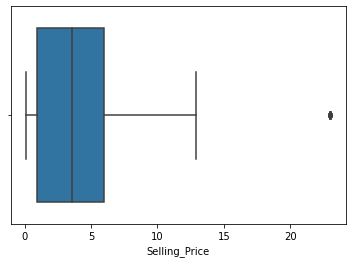

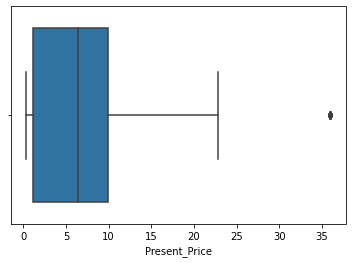

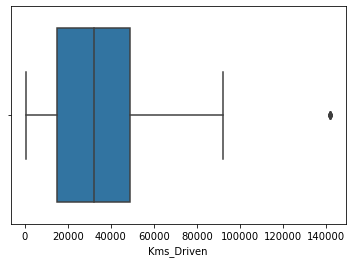

In [54]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

In [55]:
new = pd.get_dummies(cat_data,drop_first=True)
new

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,0,1,0,1,0,0
1,1,0,0,1,0,0
2,0,1,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,1,0,0
...,...,...,...,...,...,...
296,1,0,0,1,0,0
297,0,1,0,1,0,0
298,0,1,0,1,0,0
299,1,0,0,1,0,0


In [56]:
data = pd.concat((num_data,new),axis=1)
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,2014,3.35,5.59,27000,0,1,0,1,0,0
1,2013,4.75,9.54,43000,1,0,0,1,0,0
2,2017,7.25,9.85,6900,0,1,0,1,0,0
3,2011,2.85,4.15,5200,0,1,0,1,0,0
4,2014,4.60,6.87,42450,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,0,1,0,0
297,2015,4.00,5.90,60000,0,1,0,1,0,0
298,2009,3.35,11.00,87934,0,1,0,1,0,0
299,2017,11.50,12.50,9000,1,0,0,1,0,0


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        Hint: A full model is a model which includes all the features 

In [57]:
# type your code here
inp = data.drop('Selling_Price',axis = 1)
out = data['Selling_Price']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     264.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.52e-134
Time:                        21:43:08   Log-Likelihood:                -597.81
No. Observations:                 301   AIC:                             1216.
Df Residuals:                     291   BIC:                             1253.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -682.5059    103.189     -6.614      0.000    -885.597    -479.415
Year                       0.3391      0.051      6.627      0.000       0.238       0.440
Present_Price              0.5871      0.021     28.573      0.000       0.547       0.628
Kms_Driven             -1.555e-05   5.67e-06     -2.741      0.006   -2.67e-05   -4.38e-06
Fuel_Type_Diesel           1.8831      1.301      1.447      0.149      -0.678       4.444
Fuel_Type_Petrol           0.4111      1.279      0.321      0.748      -2.106       2.928
Seller_Type_Individual    -0.1833      0.275     -0.668      0.505      -0.724       0.357
Transmission_Manual       -0.1783      0.359     -0.497      0.619      -0.884       0.527
Owner_1                    0.4014      0.587      0.684      0.495      -0.754       1.556
Owner_3                  -14.4363      1.936     -7.457      0.000     -18.246     -10.626
==============================================================================
Omnibus:                      173.330   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2822.774
Skew:                           1.975   Prob(JB):                         0.00
Kurtosis:                      17.473   Cond. No.                     4.49e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
sc = StandardScaler()
inp_sc = sc.fit_transform(inp)
inp_sc = pd.DataFrame(inp_sc,columns = inp.columns)

,Year,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,0.125552,-0.260311,-0.311452,-0.498962,0.509327,-0.737285,0.39148,-0.185376,-0.057735
1,-0.227637,0.231266,0.270811,2.004162,-1.963374,-0.737285,0.39148,-0.185376,-0.057735
2,1.185121,0.269845,-1.042920,-0.498962,0.509327,-0.737285,0.39148,-0.185376,-0.057735
3,-0.934016,-0.439519,-1.104785,-0.498962,0.509327,-0.737285,0.39148,-0.185376,-0.057735
4,0.125552,-0.101015,0.250796,2.004162,-1.963374,-0.737285,0.39148,-0.185376,-0.057735
...,...,...,...,...,...,...,...,...,...
296,0.831932,0.487632,-0.057148,2.004162,-1.963374,-0.737285,0.39148,-0.185376,-0.057735
297,0.478742,-0.221731,0.889466,-0.498962,0.509327,-0.737285,0.39148,-0.185376,-0.057735
298,-1.640395,0.412962,1.906025,-0.498962,0.509327,-0.737285,0.39148,-0.185376,-0.057735
299,1.185121,0.599637,-0.966498,2.004162,-1.963374,-0.737285,0.39148,-0.185376,-0.057735


In [60]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inp_sc.values,i) for i in range(inp_sc.shape[1])]
vif['Features'] = inp_sc.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
3,25.295362,Fuel_Type_Diesel
4,25.040534,Fuel_Type_Petrol
1,2.552006,Present_Price
2,2.273584,Kms_Driven
0,1.964956,Year
5,1.609660,Seller_Type_Individual
6,1.386561,Transmission_Manual
8,1.161482,Owner_3
7,1.035622,Owner_1


In [61]:
inpv1 = inp_sc.drop('Fuel_Type_Diesel',1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]
vif['Features'] = inpv1.columns
vif = vif.sort_values('VIF',ascending=False)
vif

,VIF,Features
1,2.519862,Present_Price
2,2.270946,Kms_Driven
0,1.960272,Year
4,1.602054,Seller_Type_Individual
3,1.468487,Fuel_Type_Petrol
5,1.386067,Transmission_Manual
7,1.159659,Owner_3
6,1.035202,Owner_1


'Fuel_Type_Diesel' has multicollinearity

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
# type your code here
inp = inp_sc[['Present_Price','Seller_Type_Individual']]
out = data['Selling_Price']
inpc = sm.add_constant(inp)
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     555.0
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          3.26e-101
Time:                        21:46:08   Log-Likelihood:                -697.95
No. Observations:                 301   AIC:                             1402.
Df Residuals:                     298   BIC:                             1413.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.8004      0.142     33.698      0.000       4.520       5.081
Present_Price              4.5092      0.169     26.650      0.000       4.176       4.842
Seller_Type_Individual    -0.4154      0.169     -2.455      0.015      -0.748      -0.082
==============================================================================
Omnibus:                       89.457   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3116.690
Skew:                          -0.386   Prob(JB):                         0.00
Kurtosis:                      18.745   Cond. No.                         1.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# type your code here
num_sc = sc.fit_transform(num_data)
num_data = pd.DataFrame(num_sc,columns=num_data.columns)
inp = num_data.drop('Selling_Price',1)
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     580.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          7.06e-124
Time:                        21:46:31   Log-Likelihood:                -641.69
No. Observations:                 301   AIC:                             1291.
Df Residuals:                     297   BIC:                             1306.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8004      0.118     40.555      0.000       4.567       5.033
Year              1.1670      0.160      7.301      0.000       0.852       1.482
Present_Price     4.8908      0.132     36.922      0.000       4.630       5.151
Kms_Driven       -0.3640      0.171     -2.125      0.034      -0.701      -0.027
==============================================================================
Omnibus:                       86.961   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3879.641
Skew:                           0.110   Prob(JB):                         0.00
Kurtosis:                      20.587   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
inp_sc['New'] = inp_sc['Present_Price'] * inp_sc['Year']
inp = inp_sc.drop(['Year','Present_Price'],axis=1)
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     50.70
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.49e-51
Time:                        21:48:25   Log-Likelihood:                -800.59
No. Observations:                 301   AIC:                             1619.
Df Residuals:                     292   BIC:                             1653.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.8218      0.202     23.817      0.000       4.423       5.220
Kms_Driven                -0.4795      0.221     -2.165      0.031      -0.915      -0.044
Fuel_Type_Diesel           2.6192      1.010      2.594      0.010       0.632       4.607
Fuel_Type_Petrol           0.5491      1.012      0.542      0.588      -1.444       2.542
Seller_Type_Individual    -2.0822      0.221     -9.436      0.000      -2.517      -1.648
Transmission_Manual       -1.7410      0.209     -8.347      0.000      -2.152      -1.331
Owner_1                   -0.2073      0.205     -1.010      0.313      -0.611       0.196
Owner_3                    0.4593      0.243      1.890      0.060      -0.019       0.937
New                        0.9528      0.225      4.230      0.000       0.510       1.396
==============================================================================
Omnibus:                      133.550   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.683
Skew:                           1.768   Prob(JB):                    2.63e-158
Kurtosis:                       9.735   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
# type your code here
inp = inp_sc[['Fuel_Type_Diesel','Fuel_Type_Petrol']]
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     64.12
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           6.93e-24
Time:                        21:55:10   Log-Likelihood:                -877.79
No. Observations:                 301   AIC:                             1762.
Df Residuals:                     298   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8004      0.259     18.540      0.000       4.291       5.310
Fuel_Type_Diesel     3.0268      1.290      2.346      0.020       0.488       5.565
Fuel_Type_Petrol     0.0969      1.290      0.075      0.940      -2.442       2.635
==============================================================================
Omnibus:                      114.303   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.999
Skew:                           1.723   Prob(JB):                     1.64e-76
Kurtosis:                       6.994   Cond. No.                         9.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [72]:
# type your code here
inp = inp_sc['Transmission_Manual']
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     55.22
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.14e-12
Time:                        21:54:58   Log-Likelihood:                -906.15
No. Observations:                 301   AIC:                             1816.
Df Residuals:                     299   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.8004      0.284     16.901      0.000       4.241       5.359
Transmission_Manual    -2.1105      0.284     -7.431      0.000      -2.669      -1.552
==============================================================================
Omnibus:                       81.704   Durbin-Watson:                   1.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.404
Skew:                           1.312   Prob(JB):                     2.74e-42
Kurtosis:                       5.895   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
# type your code here
inp = inp_sc['Present_Price']
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1086.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          1.56e-101
Time:                        02:08:40   Log-Likelihood:                -700.96
No. Observations:                 301   AIC:                             1406.
Df Residuals:                     299   BIC:                             1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8004      0.144     33.418      0.000       4.518       5.083
Present_Price     4.7334      0.144     32.951      0.000       4.451       5.016
==============================================================================
Omnibus:                      104.991   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4075.250
Skew:                          -0.629   Prob(JB):                         0.00
Kurtosis:                      20.982   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
ols_mod.conf_int(0.05)

,0,1
const,4.517743,5.083121
Present_Price,4.450664,5.016042


In [97]:
ols_mod.conf_int(0.01)

,0,1
const,4.428043,5.172821
Present_Price,4.360964,5.105742


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [93]:
# type your code here
np.sum(ols_mod.resid)

-6.608047442568932e-13

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [68]:
inp = inp_sc[['Year','Present_Price', 'Kms_Driven','Owner_1', 'Owner_3','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod1 = ols.fit()
ols_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     264.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          1.52e-134
Time:                        21:54:09   Log-Likelihood:                -597.81
No. Observations:                 301   AIC:                             1216.
Df Residuals:                     291   BIC:                             1253.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.8004      0.103     46.443      0.000       4.597       5.004
Year                       0.9602      0.145      6.627      0.000       0.675       1.245
Present_Price              4.7179      0.165     28.573      0.000       4.393       5.043
Kms_Driven                -0.4272      0.156     -2.741      0.006      -0.734      -0.120
Owner_1                    0.0719      0.105      0.684      0.495      -0.135       0.279
Owner_3                   -0.8307      0.111     -7.457      0.000      -1.050      -0.611
Fuel_Type_Diesel           0.7523      0.520      1.447      0.149      -0.271       1.775
Fuel_Type_Petrol           0.1663      0.517      0.321      0.748      -0.852       1.184
Seller_Type_Individual    -0.0876      0.131     -0.668      0.505      -0.346       0.171
Transmission_Manual       -0.0605      0.122     -0.497      0.619      -0.300       0.179
==============================================================================
Omnibus:                      173.330   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2822.774
Skew:                           1.975   Prob(JB):                         0.00
Kurtosis:                      17.473   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
inp = inp_sc[['Year','Present_Price', 'Kms_Driven','Owner_1', 'Owner_3']]
inpc = sm.add_constant(inp)
out = data['Selling_Price']
ols = sm.OLS(out,inpc)
ols_mod2 = ols.fit()
ols_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     443.9
Date:                Thu, 08 Oct 2020   Prob (F-statistic):          6.13e-135
Time:                        21:53:55   Log-Likelihood:                -609.16
No. Observations:                 301   AIC:                             1230.
Df Residuals:                     295   BIC:                             1253.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8004      0.107     45.031      0.000       4.591       5.010
Year              1.1104      0.146      7.622      0.000       0.824       1.397
Present_Price     5.0439      0.121     41.770      0.000       4.806       5.282
Kms_Driven       -0.2449      0.155     -1.575      0.116      -0.551       0.061
Owner_1           0.0858      0.108      0.792      0.429      -0.127       0.299
Owner_3          -0.9289      0.111     -8.400      0.000      -1.147      -0.711
==============================================================================
Omnibus:                      152.256   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2650.597
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      17.173   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
ols_mod1.rsquared

0.8912004977423329

In [70]:
ols_mod2.rsquared

0.8826792575327617